In [4]:
import pandas as pd
import seaborn as sns

In [5]:
df=pd.read_csv('advertising.csv')

In [6]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Here we use a heatmap to see for any missing values



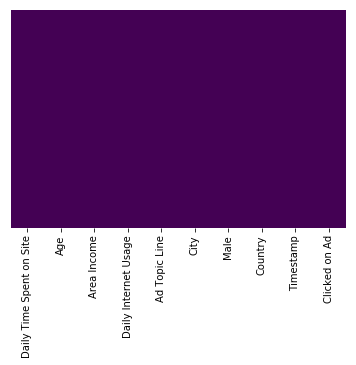

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [8]:
multicolinearity_check = df.corr()

In [9]:
multicolinearity_check

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


Text(0.5, 1.0, 'Outlier Box Plot')

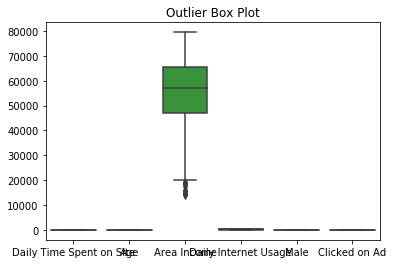

In [10]:
sns.boxplot(data= df).set_title("Outlier Box Plot")

In [16]:
df.drop(['Ad Topic Line','City','Timestamp','Male'],axis=1,inplace=True)

In [17]:
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,-0.786539
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,1.000000


In [18]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Country,Clicked on Ad
0,68.95,35,61833.90,256.09,Tunisia,0
1,80.23,31,68441.85,193.77,Nauru,0
2,69.47,26,59785.94,236.50,San Marino,0
3,74.15,29,54806.18,245.89,Italy,0
4,68.37,35,73889.99,225.58,Iceland,0


In [19]:
df.drop('Country',axis=1,inplace=True)

In [20]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0


In [21]:
X = df.iloc[:, [0,1, 2, 3]]
y = df.iloc[:, -1]

In [22]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
import sklearn
from sklearn.linear_model import LogisticRegression

Fitting the sklearn claassifier

In [26]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Using recursive feature elimination to find which attributes are useful

In [27]:
from sklearn.feature_selection import RFE

rfe = RFE(classifier, 3, step=1)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True]
[1 1 2 1]


C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

Using recursive feature elimination and cross-validated selection to find number of optimal feature(Does not tell which features are useful)

In [29]:
rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X_train, y_train)

C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [30]:
print("Optimal number of features : %d" % rfecv.n_features_)


Optimal number of features : 3


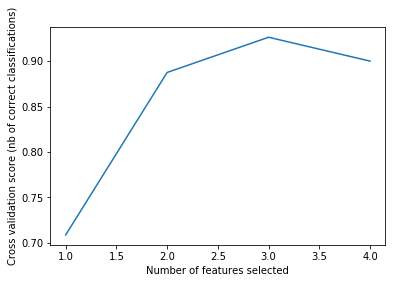

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

 CONFUSION MATRIX OF TRAIN SET

In [32]:
y_train_pred=classifier.predict(X_train)

In [33]:
y_train_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [34]:
linearity_check_df = pd.concat([pd.DataFrame(df),y],axis=1) 


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_train_pred)

In [36]:
confusion_matrix

array([[382,  26],
       [ 53, 339]], dtype=int64)

CONFUSION MATRIX OF TEST SET

In [37]:
y_test_pred=classifier.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)

In [39]:
confusion_matrix

array([[85,  7],
       [11, 97]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        92
           1       0.93      0.90      0.92       108

   micro avg       0.91      0.91      0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



In [41]:
classifier.score(X_train,y_train)

0.90125

In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier, X=X_train, y=y_train, cv=10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [43]:
accuracies

array([0.92592593, 0.90123457, 0.8875    , 0.9125    , 0.8625    ,
       0.9125    , 0.8875    , 0.8625    , 0.89873418, 0.91139241])

In [44]:
model_accuracy

0.8962287076105641

In [45]:
model_standard_deviation

0.0202492975942422

In [46]:
import statsmodels.api as sm
lm=sm.Logit(y_train,X_train)
result=lm.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.262791
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  800
Model:                          Logit   Df Residuals:                      796
Method:                           MLE   Df Model:                            3
Date:                Sun, 23 Jun 2019   Pseudo R-squ.:                  0.6208
Time:                        23:24:21   Log-Likelihood:                -210.23
converged:                       True   LL-Null:                       -554.36
                                        LLR p-value:                7.410e-149
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Daily Time Spent on Site    -0.0571      0.009     -6.354      0.000      -0.075

In [42]:
X_train.drop(['Area Income'],axis=1,inplace=True)

C:\Users\Abhay\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [43]:
X_train.head()

,Daily Time Spent on Site,Age,Daily Internet Usage
612,75.19,31,245.76
34,57.64,57,133.81
401,84.95,34,230.36
867,90.75,40,216.50
61,85.84,34,192.93


In [48]:
import statsmodels.api as sm
lm=sm.Logit(y_train,X_train)
result=lm.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.260452
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  800
Model:                          Logit   Df Residuals:                      797
Method:                           MLE   Df Model:                            2
Date:                Sun, 14 Apr 2019   Pseudo R-squ.:                  0.6242
Time:                        23:25:23   Log-Likelihood:                -208.36
converged:                       True   LL-Null:                       -554.43
                                        LLR p-value:                5.075e-151
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Daily Time Spent on Site    -0.0660      0.009     -7.502      0.000      -0.083

In [49]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier, X=X_train, y=y_train, cv=10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [50]:
accuracies

array([0.96296296, 0.95061728, 0.92592593, 0.91358025, 0.975     ,
       0.9375    , 0.92405063, 0.96202532, 0.94936709, 0.91139241])

In [51]:
model_accuracy

0.941242186279106

In [53]:
model_standard_deviation

0.020970361813145773

HERE WE OBSERVE THAT THERE IS INCREASE IN MODEL ACCURACY AFTER DELETING 1 FEATURE WITH LARGE P VALUE